#Problem 1
Idea: break the sequence  x1,x2,x3,...,x2n  into consecutive series of length  2 :  (x1,x2),(x3,x4),...,(x2n−1,x2n)  and look at each element as a random and independent point in  2D  space. Next, apply chi-square. Similarly, one can construct series of length  3,4 , etc.


Implement serial test and apply to a samples

In [1]:
import numpy as np
from scipy import stats

def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

rng.current = 1
samples = np.array([rng() for _ in range(1000)])


def serial_test(samples, series_length, k):
    series = np.array([samples[i:i + series_length] for i in range(0, len(samples), series_length)])
    bins = [np.linspace(0, 1, k + 1) for _ in range(series_length)]

    f_obs =  np.histogramdd(series, bins)[0] #наблюдаемые
    f_exp = np.full_like(f_obs,  len(series) / k**series_length, dtype=float) #ожидаемые

    p_value = stats.chisquare(f_obs.ravel(), f_exp.ravel())
    return p_value


res = serial_test(samples, series_length=2, k=20)
print(res)

Power_divergenceResult(statistic=391.2, pvalue=0.6003664860752091)


##Problem 3
Provide a statistical test to show that rng_bad has problems but rng_good does not.

In [3]:
import numpy as np
from scipy import stats

def rng_bad(m=2**31, a=65539, c=0):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m
rng_bad.current = 1
samples_bad = [rng_bad() for _ in range(1000)]

def rng_good(m=2**32, a=1103515245, c=12345):
    rng_good.current = (a * rng_good.current + c) % m
    return rng_good.current / m
rng_good.current = 1
samples_good = [rng_good() for _ in range(1000)]

k_bad = 20
f_obs_bad = np.histogram(samples_bad, np.linspace(0, 1, k_bad + 1))[0]
f_exp_bad = np.full(k_bad, len(samples_bad) // k_bad)
k_good = 20
f_obs_good = np.histogram(samples_good, np.linspace(0, 1, k_good + 1))[0]
f_exp_good = np.full(k_bad, len(samples_good) // k_good)

print('for rng_bad ', stats.chisquare(f_obs_bad, f_exp_bad))
print('for rng_good ', stats.chisquare(f_obs_good, f_exp_good))


for rng_bad  Power_divergenceResult(statistic=32.44, pvalue=0.027867772740595254)
for rng_good  Power_divergenceResult(statistic=19.279999999999998, pvalue=0.4390107032251506)


Действительно, значение pvalue слишком маленькое в случае rng_bad

##Problem 4
Simulate a sample of 1000 from a discrete distribution on a set of digits  0,1,2,…,9  with weights  0.12,0.3,0.167,0.24,0.31,0.54,0.111,0.02,0.001,0.2 . Construct a histogram from the sample. Optimise the algorithm by ordering the weights.

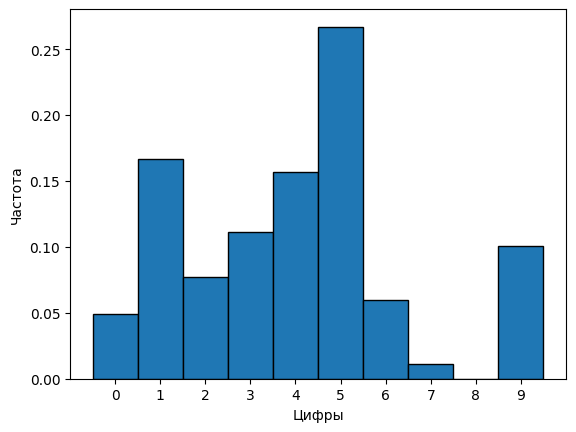

In [4]:
import numpy as np
import matplotlib.pyplot as plt

weights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
digits = np.arange(10)

sorted_index = np.argsort(weights)
sorted_weights = weights[sorted_index]
sorted_digits = digits[sorted_index]

sample = np.random.choice(sorted_digits, size=1000, p=sorted_weights / sorted_weights.sum())

plt.hist(sample, bins=np.arange(-0.5, 10.5, 1), density=True, edgecolor='black')
plt.xticks(digits)
plt.ylabel("Частота")
plt.xlabel("Цифры")
plt.show()


## Problem 5
Simulate a sample of size 1000 from the distribution $\operatorname{Exp}(\lambda)$ using the Inverse transform method. Construct a sample histogram and an accurate plot of the distribution density.